In [1]:
import time
import argparse
import sys
import logging
# from progress.bar import IncrementalBar as ProgressBar

# Python Package Imports
import os
import numpy as np
import scipy.fftpack as fft
import numpy.random as rnd
import random
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
from scipy.signal import correlate as ccor

# Local imports
from Sprinkler_Geolocation import *
from Sprinkler_LeastSquares import SprinklerLS, ReturnCodes
from converter import parse_input_files
from sprinkler_functions import *


SPEED_OF_LIGHT = 299792458
SAMPLE_RATE = 12000000  # SPS according to the Paper

In [2]:
# filepath = r"C:\Users\eleahy\Documents\Research\InterferenceGeolocation\Sprinkler\Data\HistoricalData\AR_F71V_2017_Sprinkler7\Test_20181206_Chirp"
filepath = r"C:\Users\eleahy\Documents\Research\InterferenceGeolocation\Sprinkler\DataCultivating\NconvertedFIles"

In [3]:
os.listdir(filepath)

['UUT_BMGX15330126B_OEM729_None.GPS.ascii.BESTPOS',
 'UUT_BMGX15330126B_OEM729_None.GPS.ascii.SPRINKLERDATA',
 'UUT_BMGX15330148F_OEM729_None.GPS.ascii.BESTPOS',
 'UUT_BMGX15330148F_OEM729_None.GPS.ascii.SPRINKLERDATA',
 'UUT_NMND17190006U_PWRPAK7_None.GPS.ascii.BESTPOS',
 'UUT_NMND17190006U_PWRPAK7_None.GPS.ascii.SPRINKLERDATA']

In [4]:
obs_dfs = parse_input_files(filepath)

INFO:converter:Reading C:\Users\eleahy\Documents\Research\InterferenceGeolocation\Sprinkler\DataCultivating\NconvertedFIles\UUT_BMGX15330126B_OEM729_None.GPS.ascii.BESTPOS
INFO:converter:Reading C:\Users\eleahy\Documents\Research\InterferenceGeolocation\Sprinkler\DataCultivating\NconvertedFIles\UUT_BMGX15330126B_OEM729_None.GPS.ascii.SPRINKLERDATA
INFO:converter:Processing sprinkler data
INFO:converter:Processing position data
INFO:converter:Merging position and sprinkler data
INFO:converter:Adding ENU data
INFO:converter:Reading C:\Users\eleahy\Documents\Research\InterferenceGeolocation\Sprinkler\DataCultivating\NconvertedFIles\UUT_NMND17190006U_PWRPAK7_None.GPS.ascii.BESTPOS
INFO:converter:Reading C:\Users\eleahy\Documents\Research\InterferenceGeolocation\Sprinkler\DataCultivating\NconvertedFIles\UUT_NMND17190006U_PWRPAK7_None.GPS.ascii.SPRINKLERDATA
INFO:converter:Processing sprinkler data
INFO:converter:Processing position data
INFO:converter:Merging position and sprinkler data
INF

In [5]:
epochs = get_epoch_set(obs_dfs)
print(f'found {len(epochs)} epochs total in the file')

found 393 epochs total in the file


In [6]:
test_epoch = epochs[int(len(epochs)/2)+10]  # middle of the test


In [7]:
epoch_obs = filter_for_epoch(obs_dfs, test_epoch)
max_corr_ind, corr_series, corr_axis = get_corr_offset(epoch_obs[0],epoch_obs[1] )

In [8]:
corr_axis[max_corr_ind]

0

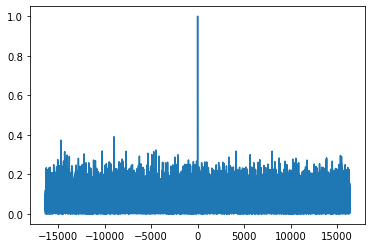

In [9]:
plt.plot(corr_axis, corr_series)
# plt.xlim([-500,500])

In [11]:
check_for_corr(corr_series)

True

In [12]:
prompt = (corr_axis[max_corr_ind], corr_series[max_corr_ind])
early = (corr_axis[max_corr_ind - 1], corr_series[max_corr_ind - 1])
late = (corr_axis[max_corr_ind + 1], corr_series[max_corr_ind + 1])
corr_offset, corr_val = apply_descriminator(early, prompt, late)

In [13]:
corr_offset

4016.0330969227084

In [14]:
corr_val

1.0068691945954185

In [15]:
dist_offset = (corr_offset / SPEED_OF_LIGHT) * SAMPLE_RATE

In [18]:
dist_offset

160.7525335513027

In [20]:
 dist_offset / SPEED_OF_LIGHT 

5.362127340485086e-07

In [21]:
corr_offset / SAMPLE_RATE

0.000334669424743559

# Manual Manipulation

### Not complex

<Figure size 1080x720 with 0 Axes>

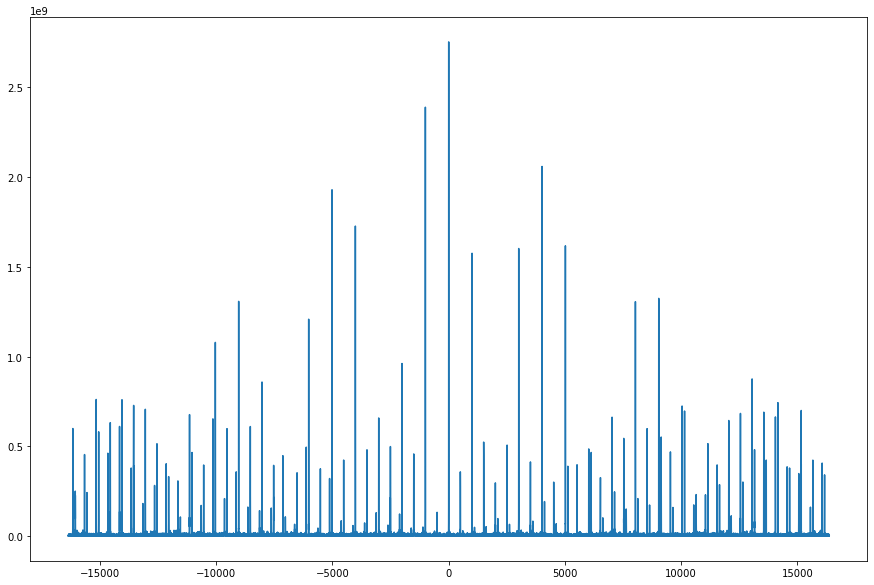

In [88]:
fig = plt.figure(figsize=(15, 10))
d1_series = complexify([obs for data in epoch_obs[0]['Data'].to_list() for obs in data])
d2_series = complexify([obs for data in epoch_obs[1]['Data'].to_list() for obs in data])
# d1_series = [obs for obs in epoch_obs[0]['Data'].to_list()[1]]
# d2_series = [obs for obs in epoch_obs[1]['Data'].to_list()[1]]
x_ax_full = get_corr_axis(d1_series)

# plt.plot(x_ax, d1_series.real)
# plt.plot(x_ax, d2_series.real)
# plt.xlim([-100,100])

fig = plt.figure(figsize=(15, 10))
man_corr = abs(fft_ccor(d1_series, d2_series).real)
# man_corr = ccor(d1_series, d2_series)
# non_abs_corr_loc = np.max(man_corr)
# man_corr /= np.max(non_abs_corr_loc)
# max_loc = np.argmax(man_corr)
corr_axis = get_corr_axis(man_corr.real)

plt.plot(corr_axis, man_corr)
# plt.xlim([-100,100])
# plt.xlim([corr_axis[int(max_loc)]-100, corr_axis[int(max_loc)]+100])

In [43]:
man_corr[0:10]

array([  12636.        ,   28890.        ,   41717.99999999,
         42733.        ,   28663.        ,   -5350.00000001,
        -58854.99999999, -127351.00000001, -207457.99999999,
       -290221.        ])

In [84]:
a = [a for a in epoch_obs[0]['Data']]
a = [a for a in epoch_obs[0]['Data']]

In [85]:
a[0]

[-162,
 -302,
 -279,
 -233,
 -338,
 -100,
 -337,
 37,
 -304,
 154,
 -220,
 242,
 -113,
 305,
 -24,
 333,
 103,
 324,
 228,
 275,
 294,
 178,
 319,
 85,
 338,
 -12,
 316,
 -146,
 261,
 -225,
 192,
 -298,
 91,
 -325,
 -12,
 -338,
 -131,
 -311,
 -239,
 -272,
 -302,
 -197,
 -350,
 -112,
 -364,
 -29,
 -349,
 63,
 -324,
 177,
 -250,
 228,
 -183,
 284,
 -134,
 325,
 -55,
 348,
 51,
 345,
 143,
 293,
 209,
 257,
 254,
 235,
 302,
 184,
 350,
 120,
 354,
 47,
 355,
 -41,
 334,
 -75,
 317,
 -165,
 286,
 -225,
 246,
 -260,
 185,
 -302,
 141,
 -332,
 64,
 -345,
 26,
 -368,
 -39,
 -361,
 -110,
 -347,
 -136,
 -329,
 -195,
 -300,
 -245,
 -261,
 -281,
 -242,
 -312,
 -214,
 -324,
 -177,
 -346,
 -117,
 -371,
 -59,
 -363,
 -39,
 -376,
 -16,
 -365,
 19,
 -348,
 47,
 -352,
 78,
 -351,
 104,
 -336,
 121,
 -326,
 150,
 -330,
 176,
 -322,
 179,
 -301,
 203,
 -277,
 231,
 -269,
 249,
 -247,
 255,
 -234,
 276,
 -223,
 289,
 -214,
 292,
 -209,
 296,
 -219,
 285,
 -205,
 295,
 -216,
 292,
 -244,
 290,
 -231,
 298